<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [18]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize': (25, 20)})
from matplotlib import pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [13]:
# Read CSV
df = pd.read_csv("C:/Users/nadun/Documents/InstitueOfData/DATA/Sacramento_transactions.csv")
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [14]:
# ANSWER
df['price'].describe()

count       985.000000
mean     234144.263959
std      138365.839085
min        1551.000000
25%      145000.000000
50%      213750.000000
75%      300000.000000
max      884790.000000
Name: price, dtype: float64

#### 2.2 List all possible variables which might be Independent/Predictor variable.

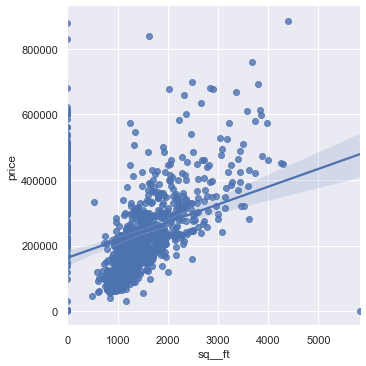

In [15]:
# ANSWER
sns.lmplot(x = 'sq__ft', y = 'price', data=df)

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [16]:
# ANSWER
df.corr()

,zip,beds,baths,sq__ft,price,latitude,longitude
zip,1.000000,0.125319,0.069165,0.130108,-0.093353,-0.290389,-0.539904
beds,0.125319,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.069165,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.130108,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,-0.093353,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.290389,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


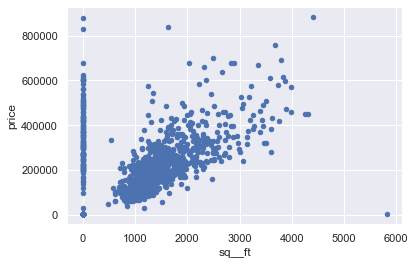

In [21]:
df.plot(kind='scatter', x='sq__ft', y='price')
plt.show()

##### 2.4.1 Fit predictor and target variables using linear regression 

In [23]:
# ANSWER

X = df['sq__ft'].values.reshape(-1,1)
Y = df['price']

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [62]:
# ANSWER


### 3. Splitting Data

In [37]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [24]:
# ANSWER
## Create training and testing subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

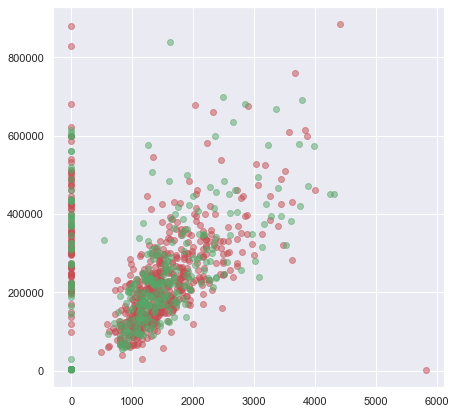

In [49]:
plt.figure(figsize=(7, 7))
plt.scatter(X_train, Y_train, label='Training Data', color = 'r', alpha = 0.5)
plt.scatter(X_test, Y_test, label='Test Data', color = 'g', alpha = 0.5)
plt.show()

#### 3.2 Check Shape, Sample of Test Train Data

In [30]:
# ANSWER
## Check training/test data
X_train.shape

(659, 1)

In [31]:
Y_train.shape

(659,)

In [35]:
X_train[:4]

array([[1758],
       [1643],
       [2354],
       [   0]], dtype=int64)

In [44]:
Y_train.sample(5)

201    152000
200    150000
285    306500
571      4897
95     254200
Name: price, dtype: int64

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [63]:
# ANSWER
lr = LinearRegression()

LinearRegression()

In [88]:
lr.fit(X_train, Y_train)

LinearRegression()

In [89]:
print(lr.coef_, lr.intercept_)

[47.43508406] 166482.34144968857


In [90]:
prediction = lr.predict(X_train)

In [91]:
# ANSWER
prediction.shape

(659,)

In [93]:
prediction[:5]

array([249873.21923575, 244418.18456829, 278144.52933842, 166482.34144969,
       230709.44527354])

In [99]:
lr.score(X_test, Y_test)

0.13602012247180006

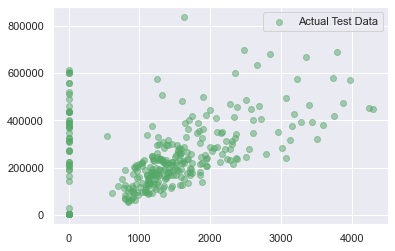

In [98]:
#plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, Y_test, label ='Actual Test Data', color ='g', alpha=.5)
plt.legend()
plt.show()            

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [104]:
# ANSWER
x = [[1204]]

Yhat = lr.predict(x)
Yhat[0]

223594.18266380776

#### Find the error

In [ ]:
# Predict price from X_test



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



